In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap

E:\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#plt.rcParams 函数用于管理全局配置，调整绘制图形时候的参数
plt.rcParams["font.sans-serif"]=["Microsoft Yahei"] #显示中文
plt.rcParams["axes.unicode_minus"]=False




In [3]:
#创建数据集
data={}
for i in range(25):
    loc=np.random.uniform(2,8)
    scale=np.random.uniform(5,15)
    data[str(i+2000)]=np.random.normal(5*(i-1)+loc,scale,100)
    

In [4]:
step_z=0.02
x_limit=[-30,150]
colors=["#71aacc","#eeeeee","#e6a6a5"]
cmap=LinearSegmentedColormap.from_list("custom_red_blue",colors)
step_size=10

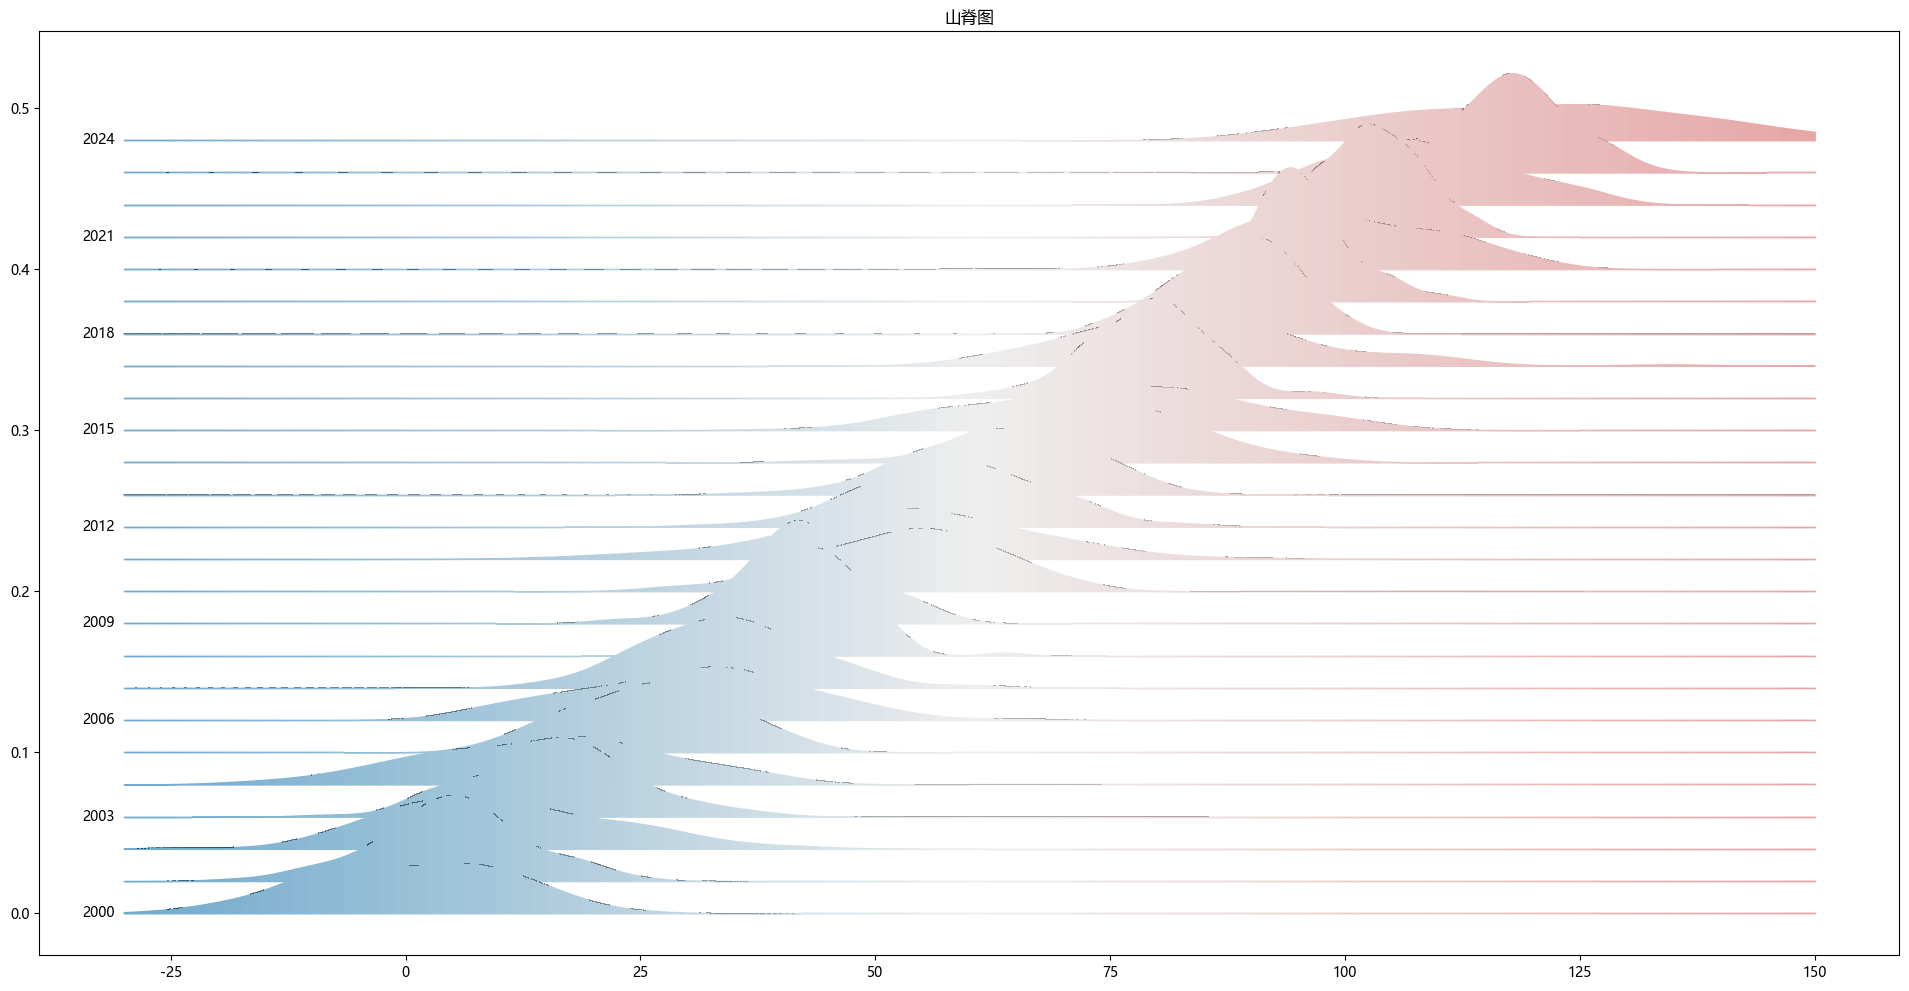

In [5]:
fig,ax=plt.subplots(figsize=(24,12))
ax.set_title('山脊图')

for i,(label,values) in enumerate(data.items()):
    kde=gaussian_kde(values)#估计概率密度
    x=np.linspace(*x_limit,1000)# 解包操作，将两个值分别返回作为起始终止值
    y=kde(x) # 基于给定的x计算kde值

    
    #使用渐变色填充
    z=i*step_z
    norm=plt.Normalize(x.min(),x.max())
    for j in range(0,len(x)-1,step_size):
        ax.fill_between(
            x[j:j+step_size+1],
            z+y[j:j+step_size+1],
            z,
            color=cmap(norm(x[j])),
            zorder=(len(data)-i)+1
        )
        ax.plot(x,i*step_z+y,color="#000",linewidth=0.0004,zorder=(len(data)-i)+1)
    if i%3==0:
        ax.text(x_limit[0]-1,i*step_z,label,ha='right',va='center')

    
    